# COMPARISON OF FIRST EMEERGING MIB WITH FIRST EMERGING LATERAL APICAL

In [1]:
#Imports needed
import numpy as np #For everything                              version 
import matplotlib.pyplot as plt #For visualisation              version 
import networkx as nx #For the graph                            version 
from pickle import load as pload #For loading the gpickle file  version 
from PIL import Image #For image management                     version 
from tqdm import tqdm #For nice loading bars                    version 
from declaration_tutti import load, treat_a_new_reseau, load_from_scratch
from fct_utils import prune,xy2t
from fct_analyse import arbre_genealogique_branches,color_by_time
#Our part:
from Reseau import Reseau,Brindille,Branche 
from scipy.optimize import curve_fit
from IPython.display import Image

# THEORY: 

### We were trying to adress/understand if the phenomena of the MIB is the same as the normal branching process. So let's find the distance in space of the first lateral newborn branch with respect to the origin of the LATERAL and then APICAL branch and compare it with the statistics of the MIB. 

# LATERAL

In [2]:
reseau= load('M2WT_200616',"branched")

In [49]:
def distance(nodo1,branch1, nodo2,branch2):
    x1=branch1.n2x[list(branch1.n2x.keys())[nodo1]]
    y1=branch1.n2y[list(branch1.n2y.keys())[nodo1]]
    x2=branch2.n2x[list(branch2.n2x.keys())[nodo2]]
    y2=branch2.n2y[list(branch2.n2y.keys())[nodo2]]
    distance=np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance
  

# Here we collect: branch born from a lateral branche 

In [51]:
# Initialize dictionaries to store distances and time differences for each 'b'
distances_dict_lat = {}
time_diffs_dict_lat = {}
distances_lat=[]
times_lat=[]
no_overlaps = [n for b in reseau.branches for n in b.noeuds if n > 0]      #all the no overlaps nodes 
lateralBranching = [b.noeuds[0]  #all nodes from which a lateral br is born
                       for b in reseau.branches 
                       if b.nature == "Lateral"]                          #all the lateral branches' starting nodes

for b in reseau.branches:
    if b.nature == 'Lateral':                                           # cycle on all the Lateral branches
       
        vicini_out = reseau.neighborhood()[b.index]['out']             #take all the outgoing neighbors 
        nodi_fuso = b.noeuds                                           #take all the nodes of the mother branch
        t_origine = b.get_tstart()                                     #time of start of the mother branch 
        nodo_origine = b.noeuds[0]                                     #node of start of the mother branch
        distances_dict_lat[b] = {}                                         
        time_diffs_dict_lat[b] = {} 
        
        for j in vicini_out:                                        #cicle on all the outgoing neighbors for all the lateral mothers 
            starting_node = j.noeuds[0] 
            
            if starting_node in no_overlaps:                       #if the startin node of the son is no overlap node and belongs to the mother
                if starting_node in nodi_fuso:  
                        starting_time = j.get_tstart()  
                        if j != b:                                  #of course son must be different than mother
                         if starting_time < b.get_tend():  
                                dis = distance(nodo_origine, b, starting_node, j)   #calculate the distance between starting point of mother and son
                                time_diff = starting_time - t_origine              #calculate time difference 
                                distances_lat.append(dis)
                                times_lat.append(time_diff)                                # Store distance and time difference in dictionaries according to 'b' values
                                distances_dict_lat[b][j] = dis
                                time_diffs_dict_lat[b][j] = time_diff


Remove the 0 values 

In [7]:
distances_dict = {key: value for key, value in distances_dict.items() if value}

NameError: name 'distances_dict' is not defined

In [8]:
closest_neighbors_old_lat = {}
for b in distances_dict_lat.keys():
    min_distance = float('inf') 
    closest_neighbor = None
    for neighbor, distance in distances_dict_lat[b].items():
        if distance < min_distance:
            min_distance = distance
            closest_neighbor = neighbor
    closest_neighbors_old_lat[b] = (closest_neighbor, min_distance)

closest_neighbors_new_lat = closest_neighbors_old_lat.copy()
for i in closest_neighbors_old_lat.keys():

    if closest_neighbors_old_lat[i] == (None, float('inf')) : 
        closest_neighbors_new_lat.pop(i)



closest_neighbors_lat = {key: value[1] for key, value in closest_neighbors_new_lat.items()}


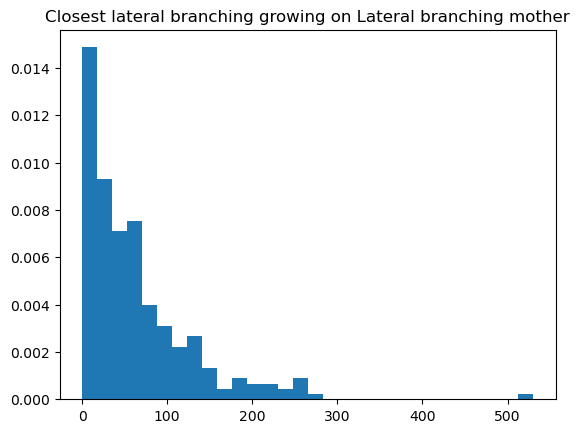

In [9]:
plt.hist(closest_neighbors_lat.values(), bins=30, density=True)
plt.title('Closest lateral branching growing on Lateral branching mother')
plt.show()

# APICAL 

In [17]:
def distance(nodo1,branch1, nodo2,branch2):
    x1=branch1.n2x[list(branch1.n2x.keys())[nodo1]]
    y1=branch1.n2y[list(branch1.n2y.keys())[nodo1]]
    x2=branch2.n2x[list(branch2.n2x.keys())[nodo2]]
    y2=branch2.n2y[list(branch2.n2y.keys())[nodo2]]
    distance=np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance

# Initialize dictionaries to store distances and time differences for each 'b'
distances_dict_AP = {}
time_diffs_dict_AP = {}
distances_AP=[]
times_AP=[]
no_overlaps = [n for b in reseau.branches for n in b.noeuds if n > 0]      #all the no overlaps nodes 
lateralBranching = [b.noeuds[0]  #tutti i nodi di inizio di branch laterali.
                       for b in reseau.branches 
                       if b.nature == "Lateral"]                          #all the lateral branches' starting nodes

for b in reseau.branches:
    if b.nature == 'Apical':                                           # cycle on all the Apical branches
       
        vicini_out = reseau.neighborhood()[b.index]['out']             #take all the outgoing neighbors 
        nodi_fuso = b.noeuds                                           #take all the nodes of the mother branch
        t_origine = b.get_tstart()                                     #time of start of the mother branch 
        nodo_origine = b.noeuds[0]                                     #node of start of the mother branch
        distances_dict_AP[b] = {}                                         
        time_diffs_dict_AP[b] = {} 
        
        for j in vicini_out:                                        #cicle on all the outgoing neighbors for all the lateral mothers 
            starting_node = j.noeuds[0] 
            
            if starting_node in no_overlaps:                       #if the startin node of the son is no overlap node and belongs to the mother
                if starting_node in nodi_fuso:  
                        starting_time = j.get_tstart()  
                        if j != b:                                  #of course son must be different than mother
                                print('ramo mamma', b,'origine',nodo_origine, 'ramo figlio', j, 'tempo figlio' , starting_node) 
                                
                                dis = distance(nodo_origine, b, starting_node, j)   #calculate the distance between starting point of mother and son
                                time_diff = starting_time - t_origine              #calculate time difference 
                                distances_AP.append(dis)
                                times_AP.append(time_diff)
                                # Store distance and time difference in dictionaries according to 'b' values
                                distances_dict_AP[b][j] = dis
                                time_diffs_dict_AP[b][j] = time_diff


ramo mamma Branche 7 - 35 noeuds origine 728 ramo figlio Branche 9 - 3 noeuds tempo figlio 790
ramo mamma Branche 8 - 25 noeuds origine 749 ramo figlio Branche 11 - 15 noeuds tempo figlio 799
ramo mamma Branche 9 - 3 noeuds origine 790 ramo figlio Branche 10 - 13 noeuds tempo figlio 792
ramo mamma Branche 15 - 105 noeuds origine 1255 ramo figlio Branche 13 - 28 noeuds tempo figlio 949
ramo mamma Branche 15 - 105 noeuds origine 1255 ramo figlio Branche 12 - 9 noeuds tempo figlio 907
ramo mamma Branche 22 - 139 noeuds origine 2104 ramo figlio Branche 21 - 46 noeuds tempo figlio 2038
ramo mamma Branche 22 - 139 noeuds origine 2104 ramo figlio Branche 20 - 20 noeuds tempo figlio 1790
ramo mamma Branche 26 - 50 noeuds origine 2372 ramo figlio Branche 27 - 5 noeuds tempo figlio 2383
ramo mamma Branche 26 - 50 noeuds origine 2372 ramo figlio Branche 124 - 7 noeuds tempo figlio 7240
ramo mamma Branche 29 - 164 noeuds origine 2527 ramo figlio Branche 25 - 12 noeuds tempo figlio 2186
ramo mamma 

ramo mamma Branche 119 - 63 noeuds origine 6789 ramo figlio Branche 107 - 9 noeuds tempo figlio 6204
ramo mamma Branche 119 - 63 noeuds origine 6789 ramo figlio Branche 108 - 13 noeuds tempo figlio 6246
ramo mamma Branche 123 - 17 noeuds origine 7167 ramo figlio Branche 122 - 13 noeuds tempo figlio 7132
ramo mamma Branche 126 - 12 noeuds origine 7355 ramo figlio Branche 125 - 22 noeuds tempo figlio 7351
ramo mamma Branche 127 - 54 noeuds origine 7400 ramo figlio Branche 43 - 18 noeuds tempo figlio 3136
ramo mamma Branche 131 - 182 noeuds origine 7697 ramo figlio Branche 132 - 103 noeuds tempo figlio 7725
ramo mamma Branche 131 - 182 noeuds origine 7697 ramo figlio Branche 129 - 77 noeuds tempo figlio 7510
ramo mamma Branche 131 - 182 noeuds origine 7697 ramo figlio Branche 128 - 28 noeuds tempo figlio 7438
ramo mamma Branche 132 - 103 noeuds origine 7725 ramo figlio Branche 147 - 34 noeuds tempo figlio 8934
ramo mamma Branche 132 - 103 noeuds origine 7725 ramo figlio Branche 148 - 22 n

ramo mamma Branche 205 - 85 noeuds origine 12149 ramo figlio Branche 211 - 26 noeuds tempo figlio 12447
ramo mamma Branche 205 - 85 noeuds origine 12149 ramo figlio Branche 182 - 25 noeuds tempo figlio 11058
ramo mamma Branche 205 - 85 noeuds origine 12149 ramo figlio Branche 181 - 40 noeuds tempo figlio 11044
ramo mamma Branche 205 - 85 noeuds origine 12149 ramo figlio Branche 179 - 258 noeuds tempo figlio 10956
ramo mamma Branche 205 - 85 noeuds origine 12149 ramo figlio Branche 180 - 12 noeuds tempo figlio 10956
ramo mamma Branche 207 - 88 noeuds origine 12269 ramo figlio Branche 209 - 38 noeuds tempo figlio 12317
ramo mamma Branche 207 - 88 noeuds origine 12269 ramo figlio Branche 210 - 17 noeuds tempo figlio 12332
ramo mamma Branche 207 - 88 noeuds origine 12269 ramo figlio Branche 215 - 44 noeuds tempo figlio 12534
ramo mamma Branche 207 - 88 noeuds origine 12269 ramo figlio Branche 225 - 33 noeuds tempo figlio 13155
ramo mamma Branche 207 - 88 noeuds origine 12269 ramo figlio Br

ramo mamma Branche 290 - 105 noeuds origine 17101 ramo figlio Branche 291 - 26 noeuds tempo figlio 17118
ramo mamma Branche 290 - 105 noeuds origine 17101 ramo figlio Branche 292 - 23 noeuds tempo figlio 17140
ramo mamma Branche 290 - 105 noeuds origine 17101 ramo figlio Branche 299 - 44 noeuds tempo figlio 17317
ramo mamma Branche 290 - 105 noeuds origine 17101 ramo figlio Branche 384 - 9 noeuds tempo figlio 21977
ramo mamma Branche 290 - 105 noeuds origine 17101 ramo figlio Branche 382 - 2 noeuds tempo figlio 21916
ramo mamma Branche 298 - 200 noeuds origine 17277 ramo figlio Branche 295 - 9 noeuds tempo figlio 17194
ramo mamma Branche 298 - 200 noeuds origine 17277 ramo figlio Branche 296 - 14 noeuds tempo figlio 17200
ramo mamma Branche 298 - 200 noeuds origine 17277 ramo figlio Branche 293 - 8 noeuds tempo figlio 17168
ramo mamma Branche 298 - 200 noeuds origine 17277 ramo figlio Branche 294 - 41 noeuds tempo figlio 17169
ramo mamma Branche 298 - 200 noeuds origine 17277 ramo figl

ramo mamma Branche 374 - 4 noeuds origine 20869 ramo figlio Branche 375 - 33 noeuds tempo figlio 20869
ramo mamma Branche 374 - 4 noeuds origine 20869 ramo figlio Branche 373 - 202 noeuds tempo figlio 20864
ramo mamma Branche 374 - 4 noeuds origine 20869 ramo figlio Branche 376 - 41 noeuds tempo figlio 20889
ramo mamma Branche 382 - 2 noeuds origine 21916 ramo figlio Branche 383 - 19 noeuds tempo figlio 21918
ramo mamma Branche 389 - 30 noeuds origine 22117 ramo figlio Branche 390 - 3 noeuds tempo figlio 22172
ramo mamma Branche 389 - 30 noeuds origine 22117 ramo figlio Branche 391 - 33 noeuds tempo figlio 22187
ramo mamma Branche 389 - 30 noeuds origine 22117 ramo figlio Branche 453 - 35 noeuds tempo figlio 24973
ramo mamma Branche 390 - 3 noeuds origine 22172 ramo figlio Branche 404 - 9 noeuds tempo figlio 22481
ramo mamma Branche 402 - 68 noeuds origine 22392 ramo figlio Branche 403 - 13 noeuds tempo figlio 22419
ramo mamma Branche 402 - 68 noeuds origine 22392 ramo figlio Branche 4

ramo mamma Branche 449 - 294 noeuds origine 24689 ramo figlio Branche 253 - 27 noeuds tempo figlio 15046
ramo mamma Branche 449 - 294 noeuds origine 24689 ramo figlio Branche 248 - 13 noeuds tempo figlio 14819
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 457 - 25 noeuds tempo figlio 25251
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 367 - 2 noeuds tempo figlio 20582
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 370 - 23 noeuds tempo figlio 20793
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 371 - 15 noeuds tempo figlio 20796
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 362 - 18 noeuds tempo figlio 20417
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 358 - 15 noeuds tempo figlio 20324
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo figlio Branche 1024 - 4 noeuds tempo figlio 57565
ramo mamma Branche 450 - 342 noeuds origine 24777 ramo f

ramo mamma Branche 562 - 56 noeuds origine 31215 ramo figlio Branche 565 - 6 noeuds tempo figlio 31364
ramo mamma Branche 563 - 213 noeuds origine 31275 ramo figlio Branche 654 - 31 noeuds tempo figlio 36098
ramo mamma Branche 563 - 213 noeuds origine 31275 ramo figlio Branche 656 - 53 noeuds tempo figlio 36127
ramo mamma Branche 563 - 213 noeuds origine 31275 ramo figlio Branche 660 - 83 noeuds tempo figlio 36305
ramo mamma Branche 563 - 213 noeuds origine 31275 ramo figlio Branche 661 - 50 noeuds tempo figlio 36352
ramo mamma Branche 563 - 213 noeuds origine 31275 ramo figlio Branche 666 - 9 noeuds tempo figlio 36920
ramo mamma Branche 564 - 27 noeuds origine 31288 ramo figlio Branche 560 - 108 noeuds tempo figlio 31101
ramo mamma Branche 574 - 81 noeuds origine 32067 ramo figlio Branche 571 - 29 noeuds tempo figlio 31978
ramo mamma Branche 574 - 81 noeuds origine 32067 ramo figlio Branche 540 - 17 noeuds tempo figlio 29478
ramo mamma Branche 574 - 81 noeuds origine 32067 ramo figlio

ramo mamma Branche 708 - 120 noeuds origine 39804 ramo figlio Branche 691 - 8 noeuds tempo figlio 39107
ramo mamma Branche 708 - 120 noeuds origine 39804 ramo figlio Branche 709 - 10 noeuds tempo figlio 39836
ramo mamma Branche 708 - 120 noeuds origine 39804 ramo figlio Branche 692 - 87 noeuds tempo figlio 39118
ramo mamma Branche 708 - 120 noeuds origine 39804 ramo figlio Branche 693 - 36 noeuds tempo figlio 39137
ramo mamma Branche 708 - 120 noeuds origine 39804 ramo figlio Branche 713 - 31 noeuds tempo figlio 40175
ramo mamma Branche 708 - 120 noeuds origine 39804 ramo figlio Branche 715 - 90 noeuds tempo figlio 40197
ramo mamma Branche 709 - 10 noeuds origine 39836 ramo figlio Branche 708 - 120 noeuds tempo figlio 39804
ramo mamma Branche 709 - 10 noeuds origine 39836 ramo figlio Branche 707 - 11 noeuds tempo figlio 39796
ramo mamma Branche 712 - 70 noeuds origine 40079 ramo figlio Branche 711 - 38 noeuds tempo figlio 39949
ramo mamma Branche 712 - 70 noeuds origine 40079 ramo figl

ramo mamma Branche 799 - 27 noeuds origine 45140 ramo figlio Branche 800 - 8 noeuds tempo figlio 45140
ramo mamma Branche 799 - 27 noeuds origine 45140 ramo figlio Branche 802 - 48 noeuds tempo figlio 45223
ramo mamma Branche 799 - 27 noeuds origine 45140 ramo figlio Branche 855 - 17 noeuds tempo figlio 47556
ramo mamma Branche 804 - 15 noeuds origine 45251 ramo figlio Branche 803 - 14 noeuds tempo figlio 45241
ramo mamma Branche 804 - 15 noeuds origine 45251 ramo figlio Branche 801 - 7 noeuds tempo figlio 45162
ramo mamma Branche 827 - 5 noeuds origine 46621 ramo figlio Branche 828 - 10 noeuds tempo figlio 46621
ramo mamma Branche 838 - 515 noeuds origine 46972 ramo figlio Branche 835 - 2 noeuds tempo figlio 46920
ramo mamma Branche 838 - 515 noeuds origine 46972 ramo figlio Branche 825 - 94 noeuds tempo figlio 46521
ramo mamma Branche 838 - 515 noeuds origine 46972 ramo figlio Branche 1168 - 2 noeuds tempo figlio 64774
ramo mamma Branche 838 - 515 noeuds origine 46972 ramo figlio Bra

ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1560 - 94 noeuds tempo figlio 85972
ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1561 - 42 noeuds tempo figlio 85994
ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1562 - 46 noeuds tempo figlio 86148
ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1573 - 10 noeuds tempo figlio 86665
ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1689 - 35 noeuds tempo figlio 91510
ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1685 - 32 noeuds tempo figlio 90935
ramo mamma Branche 864 - 387 noeuds origine 48086 ramo figlio Branche 1690 - 2 noeuds tempo figlio 91557
ramo mamma Branche 866 - 772 noeuds origine 48161 ramo figlio Branche 865 - 11 noeuds tempo figlio 48160
ramo mamma Branche 866 - 772 noeuds origine 48161 ramo figlio Branche 839 - 154 noeuds tempo figlio 46979
ramo mamma Branche 866 - 772 noeuds origine 4816

ramo mamma Branche 884 - 46 noeuds origine 49017 ramo figlio Branche 885 - 82 noeuds tempo figlio 49017
ramo mamma Branche 884 - 46 noeuds origine 49017 ramo figlio Branche 712 - 70 noeuds tempo figlio 40079
ramo mamma Branche 886 - 3 noeuds origine 49251 ramo figlio Branche 887 - 9 noeuds tempo figlio 49252
ramo mamma Branche 893 - 116 noeuds origine 49637 ramo figlio Branche 891 - 52 noeuds tempo figlio 49427
ramo mamma Branche 893 - 116 noeuds origine 49637 ramo figlio Branche 890 - 10 noeuds tempo figlio 49389
ramo mamma Branche 893 - 116 noeuds origine 49637 ramo figlio Branche 730 - 2 noeuds tempo figlio 41306
ramo mamma Branche 893 - 116 noeuds origine 49637 ramo figlio Branche 729 - 22 noeuds tempo figlio 41294
ramo mamma Branche 893 - 116 noeuds origine 49637 ramo figlio Branche 728 - 72 noeuds tempo figlio 41290
ramo mamma Branche 898 - 126 noeuds origine 49854 ramo figlio Branche 897 - 22 noeuds tempo figlio 49762
ramo mamma Branche 898 - 126 noeuds origine 49854 ramo figlio

ramo mamma Branche 950 - 349 noeuds origine 54050 ramo figlio Branche 922 - 6 noeuds tempo figlio 51889
ramo mamma Branche 950 - 349 noeuds origine 54050 ramo figlio Branche 910 - 17 noeuds tempo figlio 50954
ramo mamma Branche 950 - 349 noeuds origine 54050 ramo figlio Branche 909 - 95 noeuds tempo figlio 50940
ramo mamma Branche 950 - 349 noeuds origine 54050 ramo figlio Branche 906 - 215 noeuds tempo figlio 50686
ramo mamma Branche 950 - 349 noeuds origine 54050 ramo figlio Branche 726 - 24 noeuds tempo figlio 41136
ramo mamma Branche 950 - 349 noeuds origine 54050 ramo figlio Branche 679 - 34 noeuds tempo figlio 38169
ramo mamma Branche 959 - 15 noeuds origine 54601 ramo figlio Branche 968 - 2 noeuds tempo figlio 54820
ramo mamma Branche 959 - 15 noeuds origine 54601 ramo figlio Branche 969 - 7 noeuds tempo figlio 54820
ramo mamma Branche 965 - 32 noeuds origine 54750 ramo figlio Branche 966 - 45 noeuds tempo figlio 54750
ramo mamma Branche 965 - 32 noeuds origine 54750 ramo figlio

ramo mamma Branche 1061 - 24 noeuds origine 59209 ramo figlio Branche 1057 - 6 noeuds tempo figlio 59044
ramo mamma Branche 1066 - 47 noeuds origine 59400 ramo figlio Branche 1064 - 24 noeuds tempo figlio 59365
ramo mamma Branche 1066 - 47 noeuds origine 59400 ramo figlio Branche 1063 - 11 noeuds tempo figlio 59346
ramo mamma Branche 1069 - 34 noeuds origine 59591 ramo figlio Branche 1067 - 30 noeuds tempo figlio 59444
ramo mamma Branche 1069 - 34 noeuds origine 59591 ramo figlio Branche 1066 - 47 noeuds tempo figlio 59400
ramo mamma Branche 1069 - 34 noeuds origine 59591 ramo figlio Branche 1065 - 13 noeuds tempo figlio 59396
ramo mamma Branche 1070 - 38 noeuds origine 59751 ramo figlio Branche 1071 - 56 noeuds tempo figlio 59751
ramo mamma Branche 1070 - 38 noeuds origine 59751 ramo figlio Branche 1072 - 204 noeuds tempo figlio 59753
ramo mamma Branche 1071 - 56 noeuds origine 59751 ramo figlio Branche 1070 - 38 noeuds tempo figlio 59751
ramo mamma Branche 1071 - 56 noeuds origine 59

ramo mamma Branche 1207 - 4 noeuds origine 66710 ramo figlio Branche 1208 - 9 noeuds tempo figlio 66710
ramo mamma Branche 1213 - 34 noeuds origine 66848 ramo figlio Branche 1233 - 9 noeuds tempo figlio 67675
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1216 - 18 noeuds tempo figlio 66933
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1204 - 48 noeuds tempo figlio 66413
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1203 - 23 noeuds tempo figlio 66371
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1201 - 52 noeuds tempo figlio 66237
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1205 - 104 noeuds tempo figlio 66426
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1100 - 14 noeuds tempo figlio 61632
ramo mamma Branche 1217 - 348 noeuds origine 66945 ramo figlio Branche 1106 - 45 noeuds tempo figlio 61785
ramo mamma Branche 1217 - 348 noeuds orig

ramo mamma Branche 1279 - 50 noeuds origine 69307 ramo figlio Branche 1266 - 10 noeuds tempo figlio 68721
ramo mamma Branche 1279 - 50 noeuds origine 69307 ramo figlio Branche 1263 - 9 noeuds tempo figlio 68669
ramo mamma Branche 1279 - 50 noeuds origine 69307 ramo figlio Branche 1260 - 10 noeuds tempo figlio 68509
ramo mamma Branche 1279 - 50 noeuds origine 69307 ramo figlio Branche 1258 - 9 noeuds tempo figlio 68452
ramo mamma Branche 1284 - 66 noeuds origine 69489 ramo figlio Branche 1278 - 11 noeuds tempo figlio 69303
ramo mamma Branche 1284 - 66 noeuds origine 69489 ramo figlio Branche 1279 - 50 noeuds tempo figlio 69307
ramo mamma Branche 1284 - 66 noeuds origine 69489 ramo figlio Branche 1283 - 28 noeuds tempo figlio 69438
ramo mamma Branche 1285 - 5 noeuds origine 69506 ramo figlio Branche 1280 - 14 noeuds tempo figlio 69350
ramo mamma Branche 1285 - 5 noeuds origine 69506 ramo figlio Branche 1281 - 13 noeuds tempo figlio 69350
ramo mamma Branche 1287 - 18 noeuds origine 69556 

ramo mamma Branche 1389 - 103 noeuds origine 77732 ramo figlio Branche 1364 - 17 noeuds tempo figlio 75524
ramo mamma Branche 1389 - 103 noeuds origine 77732 ramo figlio Branche 1363 - 9 noeuds tempo figlio 75382
ramo mamma Branche 1391 - 74 noeuds origine 77815 ramo figlio Branche 1398 - 27 noeuds tempo figlio 78182
ramo mamma Branche 1391 - 74 noeuds origine 77815 ramo figlio Branche 1399 - 6 noeuds tempo figlio 78210
ramo mamma Branche 1391 - 74 noeuds origine 77815 ramo figlio Branche 1400 - 15 noeuds tempo figlio 78256
ramo mamma Branche 1400 - 15 noeuds origine 78256 ramo figlio Branche 1442 - 15 noeuds tempo figlio 79450
ramo mamma Branche 1400 - 15 noeuds origine 78256 ramo figlio Branche 1443 - 15 noeuds tempo figlio 79450
ramo mamma Branche 1401 - 11 noeuds origine 78344 ramo figlio Branche 1289 - 19 noeuds tempo figlio 69582
ramo mamma Branche 1401 - 11 noeuds origine 78344 ramo figlio Branche 1290 - 7 noeuds tempo figlio 69582
ramo mamma Branche 1408 - 40 noeuds origine 786

ramo mamma Branche 1450 - 5 noeuds origine 79625 ramo figlio Branche 1445 - 7 noeuds tempo figlio 79521
ramo mamma Branche 1450 - 5 noeuds origine 79625 ramo figlio Branche 1446 - 13 noeuds tempo figlio 79521
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1453 - 20 noeuds tempo figlio 79742
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1456 - 38 noeuds tempo figlio 79882
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1447 - 45 noeuds tempo figlio 79568
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1448 - 88 noeuds tempo figlio 79574
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1449 - 113 noeuds tempo figlio 79613
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1450 - 5 noeuds tempo figlio 79625
ramo mamma Branche 1452 - 351 noeuds origine 79711 ramo figlio Branche 1482 - 11 noeuds tempo figlio 81999
ramo mamma Branche 1452 - 351 noeuds origi

ramo mamma Branche 1569 - 101 noeuds origine 86577 ramo figlio Branche 1648 - 41 noeuds tempo figlio 89051
ramo mamma Branche 1569 - 101 noeuds origine 86577 ramo figlio Branche 1649 - 3 noeuds tempo figlio 89067
ramo mamma Branche 1569 - 101 noeuds origine 86577 ramo figlio Branche 1645 - 43 noeuds tempo figlio 88967
ramo mamma Branche 1569 - 101 noeuds origine 86577 ramo figlio Branche 1651 - 19 noeuds tempo figlio 89144
ramo mamma Branche 1570 - 8 noeuds origine 86579 ramo figlio Branche 1572 - 29 noeuds tempo figlio 86611
ramo mamma Branche 1572 - 29 noeuds origine 86611 ramo figlio Branche 1646 - 7 noeuds tempo figlio 89016
ramo mamma Branche 1577 - 52 noeuds origine 86942 ramo figlio Branche 1647 - 8 noeuds tempo figlio 89035
ramo mamma Branche 1577 - 52 noeuds origine 86942 ramo figlio Branche 1650 - 30 noeuds tempo figlio 89068
ramo mamma Branche 1578 - 76 noeuds origine 86998 ramo figlio Branche 1577 - 52 noeuds tempo figlio 86942
ramo mamma Branche 1578 - 76 noeuds origine 86

ramo mamma Branche 1662 - 9 noeuds origine 90077 ramo figlio Branche 1850 - 7 noeuds tempo figlio 99409
ramo mamma Branche 1672 - 19 noeuds origine 90459 ramo figlio Branche 1677 - 20 noeuds tempo figlio 90495
ramo mamma Branche 1672 - 19 noeuds origine 90459 ramo figlio Branche 1678 - 5 noeuds tempo figlio 90497
ramo mamma Branche 1672 - 19 noeuds origine 90459 ramo figlio Branche 1673 - 11 noeuds tempo figlio 90471
ramo mamma Branche 1674 - 7 noeuds origine 90488 ramo figlio Branche 1675 - 21 noeuds tempo figlio 90488
ramo mamma Branche 1675 - 21 noeuds origine 90488 ramo figlio Branche 1674 - 7 noeuds tempo figlio 90488
ramo mamma Branche 1678 - 5 noeuds origine 90497 ramo figlio Branche 1679 - 6 noeuds tempo figlio 90519
ramo mamma Branche 1679 - 6 noeuds origine 90519 ramo figlio Branche 1676 - 4 noeuds tempo figlio 90491
ramo mamma Branche 1679 - 6 noeuds origine 90519 ramo figlio Branche 1876 - 25 noeuds tempo figlio 100028
ramo mamma Branche 1679 - 6 noeuds origine 90519 ramo f

ramo mamma Branche 1753 - 19 noeuds origine 95384 ramo figlio Branche 1754 - 12 noeuds tempo figlio 95384
ramo mamma Branche 1762 - 69 noeuds origine 95624 ramo figlio Branche 1760 - 11 noeuds tempo figlio 95597
ramo mamma Branche 1762 - 69 noeuds origine 95624 ramo figlio Branche 1756 - 2 noeuds tempo figlio 95434
ramo mamma Branche 1762 - 69 noeuds origine 95624 ramo figlio Branche 1755 - 22 noeuds tempo figlio 95414
ramo mamma Branche 1762 - 69 noeuds origine 95624 ramo figlio Branche 1736 - 7 noeuds tempo figlio 94508
ramo mamma Branche 1767 - 73 noeuds origine 95882 ramo figlio Branche 1718 - 4 noeuds tempo figlio 93622
ramo mamma Branche 1768 - 84 noeuds origine 95932 ramo figlio Branche 1769 - 67 noeuds tempo figlio 95951
ramo mamma Branche 1768 - 84 noeuds origine 95932 ramo figlio Branche 1783 - 8 noeuds tempo figlio 97139
ramo mamma Branche 1768 - 84 noeuds origine 95932 ramo figlio Branche 1785 - 31 noeuds tempo figlio 97149
ramo mamma Branche 1768 - 84 noeuds origine 95932 

ramo mamma Branche 1842 - 26 noeuds origine 99099 ramo figlio Branche 1844 - 9 noeuds tempo figlio 99105
ramo mamma Branche 1842 - 26 noeuds origine 99099 ramo figlio Branche 1841 - 12 noeuds tempo figlio 99077
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1855 - 19 noeuds tempo figlio 99509
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1859 - 266 noeuds tempo figlio 99562
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1870 - 6 noeuds tempo figlio 99858
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1869 - 6 noeuds tempo figlio 99826
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1871 - 19 noeuds tempo figlio 99892
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1873 - 15 noeuds tempo figlio 99981
ramo mamma Branche 1854 - 65 noeuds origine 99509 ramo figlio Branche 1875 - 25 noeuds tempo figlio 100017
ramo mamma Branche 1854 - 65 noeuds origine 995

ramo mamma Branche 1993 - 37 noeuds origine 106492 ramo figlio Branche 1999 - 31 noeuds tempo figlio 106649
ramo mamma Branche 1993 - 37 noeuds origine 106492 ramo figlio Branche 2001 - 30 noeuds tempo figlio 106757
ramo mamma Branche 1993 - 37 noeuds origine 106492 ramo figlio Branche 2008 - 22 noeuds tempo figlio 106990
ramo mamma Branche 1993 - 37 noeuds origine 106492 ramo figlio Branche 2006 - 19 noeuds tempo figlio 106977
ramo mamma Branche 1993 - 37 noeuds origine 106492 ramo figlio Branche 2007 - 36 noeuds tempo figlio 106977
ramo mamma Branche 1997 - 5 noeuds origine 106581 ramo figlio Branche 1998 - 2 noeuds tempo figlio 106591
ramo mamma Branche 1999 - 31 noeuds origine 106649 ramo figlio Branche 2000 - 33 noeuds tempo figlio 106656
ramo mamma Branche 2000 - 33 noeuds origine 106656 ramo figlio Branche 1998 - 2 noeuds tempo figlio 106591
ramo mamma Branche 2002 - 34 noeuds origine 106795 ramo figlio Branche 1799 - 7 noeuds tempo figlio 97447
ramo mamma Branche 2006 - 19 noeu

In [18]:
distances_dict_AP = {key: value for key, value in distances_dict_AP.items() if value}

In [19]:
closest_neighbors_old_ap = {}
for b in distances_dict_AP.keys():
    min_distance = float('inf') 
    closest_neighbor = None
    for neighbor, distance in distances_dict_AP[b].items():
        if distance < min_distance:
            min_distance = distance
            closest_neighbor = neighbor
    closest_neighbors_old_ap[b] = (closest_neighbor, min_distance)

closest_neighbors_new_ap = closest_neighbors_old_ap.copy()
for i in closest_neighbors_old_ap.keys():

    if closest_neighbors_old_ap[i] == (None, float('inf')) : 
        closest_neighbors_new_ap.pop(i)



closest_neighbors_ap = {key: value[1] for key, value in closest_neighbors_new_ap.items()}



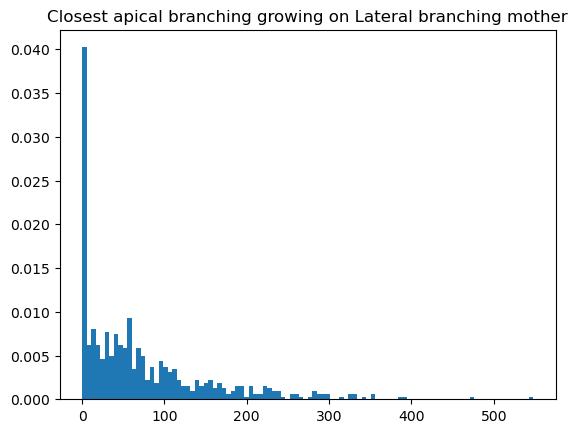

In [21]:
plt.hist(closest_neighbors_ap.values() , bins=100 , density= True)
plt.title('Closest apical branching growing on Lateral branching mother')
plt.show()

 ### LET'S PLOT THE TWO TOGETHER TO IDENTIFY DIFFERENCES

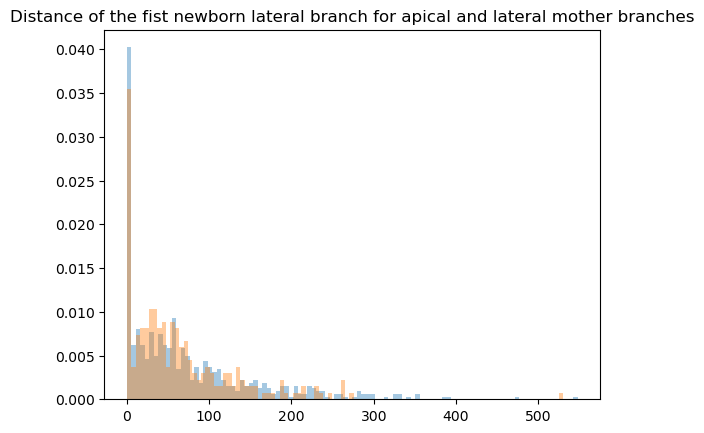

In [24]:
plt.hist(closest_neighbors_ap.values() , bins=100 ,alpha = 0.4 , density= True)
plt.hist(closest_neighbors_lat.values() , bins=100 ,alpha = 0.4 , density= True)
plt.title('Distance of the fist newborn lateral branch for apical and lateral mother branches') 
plt.show()

In [29]:
from scipy.stats import kstest
statistic, p_value = kstest(list(closest_neighbors_lat.values()),list(closest_neighbors_ap.values() ))
print("Kolmogorov-Smirnov test statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test statistic: 0.07444333665669657
p-value: 0.2610978749818669


In [26]:
total= list(closest_neighbors_lat.values()) + list(closest_neighbors_AP.values()) 

NameError: name 'closest_neighbors_AP' is not defined

In [27]:
plt.hist(total, bins=100,alpha=0.4, density= True) 
plt.title('apical + lateral distance hist of the first emerging lateral branch son') 
plt.show()

NameError: name 'total' is not defined

# NORMALIZE BY THE TOTAL LENGTH OF THE BRANCH 

In [30]:
def abscisse_curviligne(b) -> (np.ndarray, float):
    """
    Renvoie la liste des abscisses curvilignes des noeuds de la branche
    et la longueur totale de la branche
    """
    pos = np.array([[b.n2x[n], b.n2y[n]] for n in b.noeuds])
    distances = np.sqrt(np.sum((pos[1:, :] - pos[:-1, :]) ** 2, axis=-1))
    total_length = np.sum(distances)
    abscisse = np.cumsum(distances)
    abscisse = np.insert(abscisse, 0, 0)
    return abscisse, total_length
def lengths(reseau):
     lens=[]
     lengths = {n: [] for n in reseau.branches}
     for b in reseau.branches: 
        value = abscisse_curviligne(b)[1]
        lengths[b].append(value)
     return lengths

lenghts= lengths(reseau)
lens=[]
lens_fusion=[]
for key,value in lengths(reseau).items():
    if key.ending == 'Fusion?' and value[0] != 0:
        lens_fusion.append(value[0])
    if value[0] != 0:                           #ZEROS HAVE BEEN MANUALLY REMOVED
        lens.append(value[0])


In [34]:
normalized_normal=[]
for i in closest_neighbors_lat.keys():
    #print('distance', closest_neighbors[i],'ramo', i, ' length of the branch',lenghts[i], 'figlio', distances_dict[i] )
    normalized_normal.append((closest_neighbors_lat[i] / lenghts[i] ) [0])
for j in closest_neighbors_ap.keys():
    normalized_normal.append((closest_neighbors_ap[j] / lenghts[j] )[0])
normalized_normal = [n for n in normalized_normal if n != 0.0 ]   

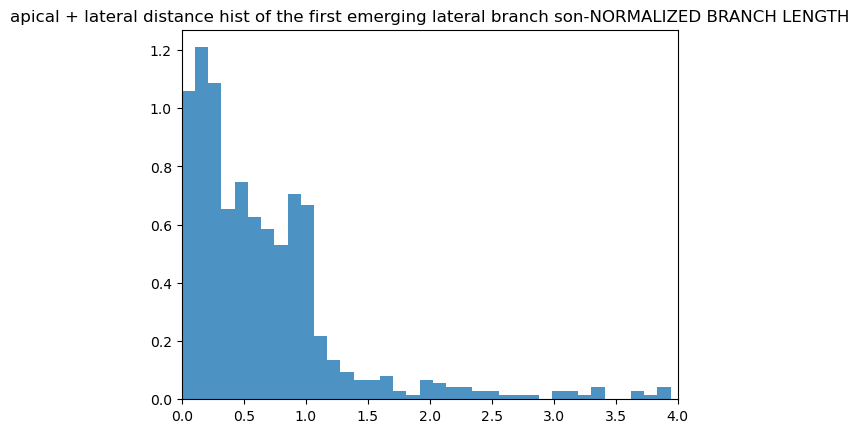

In [35]:
plt.hist(normalized_normal, bins=300,alpha=0.8, density= True) 
plt.title('apical + lateral distance hist of the first emerging lateral branch son-NORMALIZED BRANCH LENGTH') 
plt.xlim(0,4)
plt.show()

# COMPARISON 

In [42]:
# Initialize dictionaries to store distances and time differences for each 'b'
distances_dict = {}
time_diffs_dict = {}
distances=[]
times=[]


for b in reseau.branches:
    if b.ending == 'Fusion?':         
       
        vicini_out = reseau.neighborhood()[b.index]['out']  
        nodi_fuso = b.noeuds 
        t_fusione = b.get_tend()  
        nodo_fusione = b.noeuds[-1]  
        distances_dict[b] = {}  
        time_diffs_dict[b] = {} 
        
        for j in vicini_out:  
            starting_node = j.noeuds[0] 
            
            if starting_node in no_overlaps:
                if starting_node in lateralBranching:
                    if starting_node != nodo_fusione:  # If the starting node of the neighbor is the father of a lateral branch and is a node of no overlap 
                        # Calculate starting time as the time of the second element of the branchement  
                        starting_time = j.get_tstart()  
                        
                        if t_fusione < starting_time:
                            if j != b: 
                                dis = distance(nodo_fusione, b, starting_node, j)  
                                time_diff = starting_time - t_fusione
                                distances.append(dis)
                                times.append(time_diff)
                                # Store distance and time difference in dictionaries according to 'b' values
                                distances_dict[b][j] = dis
                                time_diffs_dict[b][j] = time_diff


In [43]:

closest_neighbors_old = {}
for b in distances_dict.keys():
    min_distance = float('inf') 
    closest_neighbor = None
    for neighbor, distance in distances_dict[b].items():
        if distance < min_distance:
            min_distance = distance
            closest_neighbor = neighbor
    closest_neighbors_old[b] = (closest_neighbor, min_distance)

closest_neighbors_new = closest_neighbors_old.copy()
for i in closest_neighbors_old.keys():

    if closest_neighbors_old[i] == (None, float('inf')) : 
        closest_neighbors_new.pop(i)



closest_neighbors = {key: value[1] for key, value in closest_neighbors_new.items()}



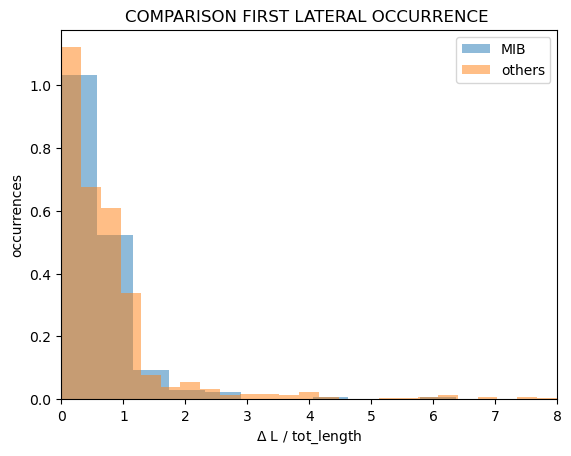

In [44]:
normalized=[]

for i in closest_neighbors.keys():
    normalized.append(closest_neighbors[i] / lenghts[i] ) 
norm=[]
for l in normalized:
    if l!= 0.0:
        norm.append(l[0])


plt.hist(norm,bins=30 , alpha=0.5 ,density = True,label = 'MIB')
plt.hist(normalized_normal, bins= 100, alpha=0.5, density=True, label= 'others')
plt.legend()
plt.xlabel('$\Delta$ L / tot_length')
plt.ylabel('occurrences')
plt.title('COMPARISON FIRST LATERAL OCCURRENCE ' ) 
#plt.plot(bin_centers, gaussian(bin_centers, *popt), color='red', label='Gaussian Fit')
plt.xlim(0,8.0)
plt.show()


In [45]:
from scipy.stats import kstest
statistic, p_value = kstest(norm,normalized_normal)
print("Kolmogorov-Smirnov test statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test statistic: 0.13488427781653115
p-value: 0.0012998375647383456


### $P-value \approx 8 \cdot 10^{-14} \ll 1$ so the  two distributions differ significantly. 


In [46]:
print('AVERAGE FIRST BRANCHING DISTANCE NOT MIB' , np.mean(normalized_normal))
print('AVERAGE FIRST BRANCHING DISTANCE  MIB' , np.mean(norm))

AVERAGE FIRST BRANCHING DISTANCE NOT MIB 0.967162707840002
AVERAGE FIRST BRANCHING DISTANCE  MIB 0.7081416694788624
